In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Data_Final1.csv')
df.head()

,Year,Month,Year_Month,Estate,Green leaves/Kg,kVA,KWhr,Power_Cost,cum,Fuel_Cost,Labour days,Prouction/Kg,Output_power,Output_fuel,Region,Efficiency_1,Efficiency_2,efficiency_factor
0,2017,Jan,2017-01,Dessford,188183,156,34341,637469,178,404295,1426,47011,1.368947,264.1067416,High Grown,Satisfied,Satisfied,High
1,2017,Jan,2017-01,Somerset,106682,120,21937,475407,108,256374,1083,25061,1.142408,232.0462963,High Grown,Unsatisfied,Satisfied,Moderate
2,2017,Jan,2017-01,Great_Weston,157284,120,30061,507779,179,449543,1439,36782,1.223579,205.4860335,High Grown,Satisfied,Satisfied,High
3,2017,Jan,2017-01,Mattakkelle,132732,136,26444,524786,131,349996,1125,31525,1.192142,240.648855,High Grown,Unsatisfied,Satisfied,Moderate
4,2017,Jan,2017-01,Radella,119621,115,42500,546974,194,479705,969,16779,0.394800,86.48969072,High Grown,Unsatisfied,Unsatisfied,Low


In [3]:
df.columns

Index(['Year', 'Month', 'Year_Month', 'Estate', 'Green leaves/Kg', 'kVA',
       'KWhr', 'Power_Cost', 'cum', 'Fuel_Cost', 'Labour days', 'Prouction/Kg',
       'Output_power', 'Output_fuel', 'Region', 'Efficiency_1', 'Efficiency_2',
       'efficiency_factor'],
      dtype='object')

In [4]:
df.shape

(924, 18)

In [5]:
df.dtypes

Year                   int64
Month                 object
Year_Month            object
Estate                object
Green leaves/Kg       object
kVA                   object
KWhr                  object
Power_Cost            object
cum                   object
Fuel_Cost             object
Labour days            int64
Prouction/Kg          object
Output_power         float64
Output_fuel           object
Region                object
Efficiency_1          object
Efficiency_2          object
efficiency_factor     object
dtype: object

In [6]:
# Step 1: Remove non-numeric characters and convert to integer
columns_to_convert = ['Green leaves/Kg','kVA', 'KWhr', 'Power_Cost', 'cum', 'Fuel_Cost','Prouction/Kg']

for col in columns_to_convert:
    # Remove non-numeric characters
    df[col] = df[col].replace('[^\d.]', '', regex=True)
    # Convert empty strings to NaN and then fill NaN with 0
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype('int64')

# Step 2: Check the data types after conversion
print(df.dtypes)

Year                   int64
Month                 object
Year_Month            object
Estate                object
Green leaves/Kg        int64
kVA                    int64
KWhr                   int64
Power_Cost             int64
cum                    int64
Fuel_Cost              int64
Labour days            int64
Prouction/Kg           int64
Output_power         float64
Output_fuel           object
Region                object
Efficiency_1          object
Efficiency_2          object
efficiency_factor     object
dtype: object


In [7]:
# Step 1: Remove non-numeric characters and convert to integer
columns_to_convert1 = ['Output_power','Output_fuel']

for col in columns_to_convert1:
    # Remove non-numeric characters
    df[col] = df[col].replace('[^\d.]', '', regex=True)
    # Convert empty strings to NaN and then fill NaN with 0
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype('float')

# Step 2: Check the data types after conversion
print(df.dtypes)

Year                   int64
Month                 object
Year_Month            object
Estate                object
Green leaves/Kg        int64
kVA                    int64
KWhr                   int64
Power_Cost             int64
cum                    int64
Fuel_Cost              int64
Labour days            int64
Prouction/Kg           int64
Output_power         float64
Output_fuel          float64
Region                object
Efficiency_1          object
Efficiency_2          object
efficiency_factor     object
dtype: object


## Handling the missing values

In [8]:
df.isnull().values.any()

True

In [9]:
import pandas as pd

# Define the file path and column name
file_path = "Data_Final1.csv"
column_name = "Green leaves/Kg"  # Replace 'Your_Column_Name' with the actual column name

# Define the values to be treated as missing in the specified column
missing_values = ['0', '-', '']

# Read the CSV file with missing values introduced only in the specified column
df = pd.read_csv(file_path,na_values = missing_values)

# Remove rows containing missing values in the specified column
df_cleaned = df.dropna(subset=[column_name])
df_cleaned.head(10)


,Year,Month,Year_Month,Estate,Green leaves/Kg,kVA,KWhr,Power_Cost,cum,Fuel_Cost,Labour days,Prouction/Kg,Output_power,Output_fuel,Region,Efficiency_1,Efficiency_2,efficiency_factor
0,2017,Jan,2017-01,Dessford,188183.0,156.0,34341.0,637469.0,178.0,404295.0,1426.0,47011.0,1.368947,264.1067416,High Grown,Satisfied,Satisfied,High
1,2017,Jan,2017-01,Somerset,106682.0,120.0,21937.0,475407.0,108.0,256374.0,1083.0,25061.0,1.142408,232.0462963,High Grown,Unsatisfied,Satisfied,Moderate
2,2017,Jan,2017-01,Great_Weston,157284.0,120.0,30061.0,507779.0,179.0,449543.0,1439.0,36782.0,1.223579,205.4860335,High Grown,Satisfied,Satisfied,High
3,2017,Jan,2017-01,Mattakkelle,132732.0,136.0,26444.0,524786.0,131.0,349996.0,1125.0,31525.0,1.192142,240.648855,High Grown,Unsatisfied,Satisfied,Moderate
4,2017,Jan,2017-01,Radella,119621.0,115.0,42500.0,546974.0,194.0,479705.0,969.0,16779.0,0.394800,86.48969072,High Grown,Unsatisfied,Unsatisfied,Low
5,2017,Jan,2017-01,Bearwell,181473.0,122.0,31037.0,546899.0,193.0,539209.0,1171.0,45381.0,1.462158,235.134715,High Grown,Satisfied,Satisfied,High
6,2017,Jan,2017-01,Holyrood,112992.0,132.0,26400.0,530000.0,126.0,310727.0,1008.0,25600.0,0.969697,203.1746032,High Grown,Unsatisfied,Satisfied,Moderate
7,2017,Jan,2017-01,Wattegoda,154883.0,115.0,27686.0,370594.0,126.0,319068.0,1248.0,40688.0,1.469624,322.9206349,High Grown,Satisfied,Satisfied,High
8,2017,Jan,2017-01,Moragalla,105104.0,104.0,22665.0,364752.0,107.0,155289.0,1322.0,22093.0,0.974763,206.4766355,Low grown,Unsatisfied,Satisfied,Moderate
9,2017,Jan,2017-01,Deniyaya,229603.0,139.0,41265.0,504470.0,294.0,585502.0,2367.0,52258.0,1.266400,177.7482993,Low grown,Satisfied,Unsatisfied,Moderate


In [10]:
#df_cleaned.to_csv('F:/4th yr/4.2/ICDT/test/2.csv')

In [11]:
df_cleaned.shape

(917, 18)

In [12]:
#Missing counts
df_cleaned.isna().sum()

Year                  0
Month                 0
Year_Month            0
Estate                0
Green leaves/Kg       0
kVA                  28
KWhr                  0
Power_Cost            5
cum                   1
Fuel_Cost             3
Labour days           0
Prouction/Kg          0
Output_power          0
Output_fuel           1
Region                0
Efficiency_1          0
Efficiency_2          0
efficiency_factor     0
dtype: int64

In [13]:
import pandas as pd


# Define the list of columns where missing values will be filled
columns_to_fill = ['kVA','KWhr', 'Power_Cost', 'cum', 'Fuel_Cost', 'Labour days', 'Prouction/Kg','Output_power', 'Output_fuel']

# Define the values to be treated as missing
missing_values = ['0', '-', '']

# Replace missing values with NaN
df_cleaned.replace(missing_values, float('nan'), inplace=True)

# Convert columns to numeric
df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].apply(pd.to_numeric)

# Calculate the mean for each estate
estate_means = df_cleaned.groupby('Estate')[columns_to_fill].transform('mean')

# Fill missing values with mean values according to the estates
df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].fillna(estate_means)

# Print the DataFrame with missing values filled
print(df_cleaned)



     Year Month Year_Month         Estate  Green leaves/Kg    kVA     KWhr  \
0    2017   Jan    2017-01       Dessford         188183.0  156.0  34341.0   
1    2017   Jan    2017-01       Somerset         106682.0  120.0  21937.0   
2    2017   Jan    2017-01   Great_Weston         157284.0  120.0  30061.0   
3    2017   Jan    2017-01    Mattakkelle         132732.0  136.0  26444.0   
4    2017   Jan    2017-01        Radella         119621.0  115.0  42500.0   
..    ...   ...        ...            ...              ...    ...      ...   
919  2023   Dec    2023-12       Holyrood         129011.0  103.0  28477.0   
920  2023   Dec    2023-12      Wattegoda         252133.0  131.0  45232.0   
921  2023   Dec    2023-12      Moragalla         100593.0   86.0  20719.0   
922  2023   Dec    2023-12       Deniyaya         197940.0  148.0  43121.0   
923  2023   Dec    2023-12  Kiruwanaganga         179009.0  127.0  47826.0   

     Power_Cost    cum  Fuel_Cost  Labour days  Prouction/Kg  O

C:\Users\TTELIT0013\AppData\Local\Temp\ipykernel_5456\4268305333.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace(missing_values, float('nan'), inplace=True)
C:\Users\TTELIT0013\AppData\Local\Temp\ipykernel_5456\4268305333.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].apply(pd.to_numeric)
C:\Users\TTELIT0013\AppData\Local\Temp\ipykernel_5456\4268305333.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [14]:
#Missing counts
df_cleaned.isna().sum()

Year                 0
Month                0
Year_Month           0
Estate               0
Green leaves/Kg      0
kVA                  0
KWhr                 0
Power_Cost           0
cum                  0
Fuel_Cost            0
Labour days          0
Prouction/Kg         0
Output_power         0
Output_fuel          0
Region               0
Efficiency_1         0
Efficiency_2         0
efficiency_factor    0
dtype: int64

In [15]:
#df_cleaned.to_csv('D:/PROJECT/ICDT/cleaned.csv')

### Clean Dataset

# Visualization

In [16]:
df1=df_cleaned.copy()
df1.head()

,Year,Month,Year_Month,Estate,Green leaves/Kg,kVA,KWhr,Power_Cost,cum,Fuel_Cost,Labour days,Prouction/Kg,Output_power,Output_fuel,Region,Efficiency_1,Efficiency_2,efficiency_factor
0,2017,Jan,2017-01,Dessford,188183.0,156.0,34341.0,637469.0,178.0,404295.0,1426.0,47011.0,1.368947,264.106742,High Grown,Satisfied,Satisfied,High
1,2017,Jan,2017-01,Somerset,106682.0,120.0,21937.0,475407.0,108.0,256374.0,1083.0,25061.0,1.142408,232.046296,High Grown,Unsatisfied,Satisfied,Moderate
2,2017,Jan,2017-01,Great_Weston,157284.0,120.0,30061.0,507779.0,179.0,449543.0,1439.0,36782.0,1.223579,205.486033,High Grown,Satisfied,Satisfied,High
3,2017,Jan,2017-01,Mattakkelle,132732.0,136.0,26444.0,524786.0,131.0,349996.0,1125.0,31525.0,1.192142,240.648855,High Grown,Unsatisfied,Satisfied,Moderate
4,2017,Jan,2017-01,Radella,119621.0,115.0,42500.0,546974.0,194.0,479705.0,969.0,16779.0,0.394800,86.489691,High Grown,Unsatisfied,Unsatisfied,Low


In [17]:
###Convert month into Datetime
df1['Year_Month']=pd.to_datetime(df1['Year_Month'])
df1.head(6)

,Year,Month,Year_Month,Estate,Green leaves/Kg,kVA,KWhr,Power_Cost,cum,Fuel_Cost,Labour days,Prouction/Kg,Output_power,Output_fuel,Region,Efficiency_1,Efficiency_2,efficiency_factor
0,2017,Jan,2017-01-01,Dessford,188183.0,156.0,34341.0,637469.0,178.0,404295.0,1426.0,47011.0,1.368947,264.106742,High Grown,Satisfied,Satisfied,High
1,2017,Jan,2017-01-01,Somerset,106682.0,120.0,21937.0,475407.0,108.0,256374.0,1083.0,25061.0,1.142408,232.046296,High Grown,Unsatisfied,Satisfied,Moderate
2,2017,Jan,2017-01-01,Great_Weston,157284.0,120.0,30061.0,507779.0,179.0,449543.0,1439.0,36782.0,1.223579,205.486033,High Grown,Satisfied,Satisfied,High
3,2017,Jan,2017-01-01,Mattakkelle,132732.0,136.0,26444.0,524786.0,131.0,349996.0,1125.0,31525.0,1.192142,240.648855,High Grown,Unsatisfied,Satisfied,Moderate
4,2017,Jan,2017-01-01,Radella,119621.0,115.0,42500.0,546974.0,194.0,479705.0,969.0,16779.0,0.394800,86.489691,High Grown,Unsatisfied,Unsatisfied,Low
5,2017,Jan,2017-01-01,Bearwell,181473.0,122.0,31037.0,546899.0,193.0,539209.0,1171.0,45381.0,1.462158,235.134715,High Grown,Satisfied,Satisfied,High


### *Region*

In [18]:
# Filter data for High Grown and Low Grown regions
high_grown_estates = df1[df1['Region'] == 'High Grown']['Estate'].nunique()
low_grown_estates = df1[df1['Region'] == 'Low grown']['Estate'].nunique()

# Print the counts
print("Number of estates in High Grown region:", high_grown_estates)
print("Number of estates in Low Grown region:", low_grown_estates)


# # Plot the counts
# plt.figure(figsize=(8, 6))
# plt.bar(['High Grown', 'Low grown'], [high_grown_estates, low_grown_estates], color=['blue', 'green'])
# plt.xlabel('Region')
# plt.ylabel('Number of Estates')
# plt.title('Number of Estates in High Grown and Low Grown Regions')
# plt.show()

Number of estates in High Grown region: 8
Number of estates in Low Grown region: 3


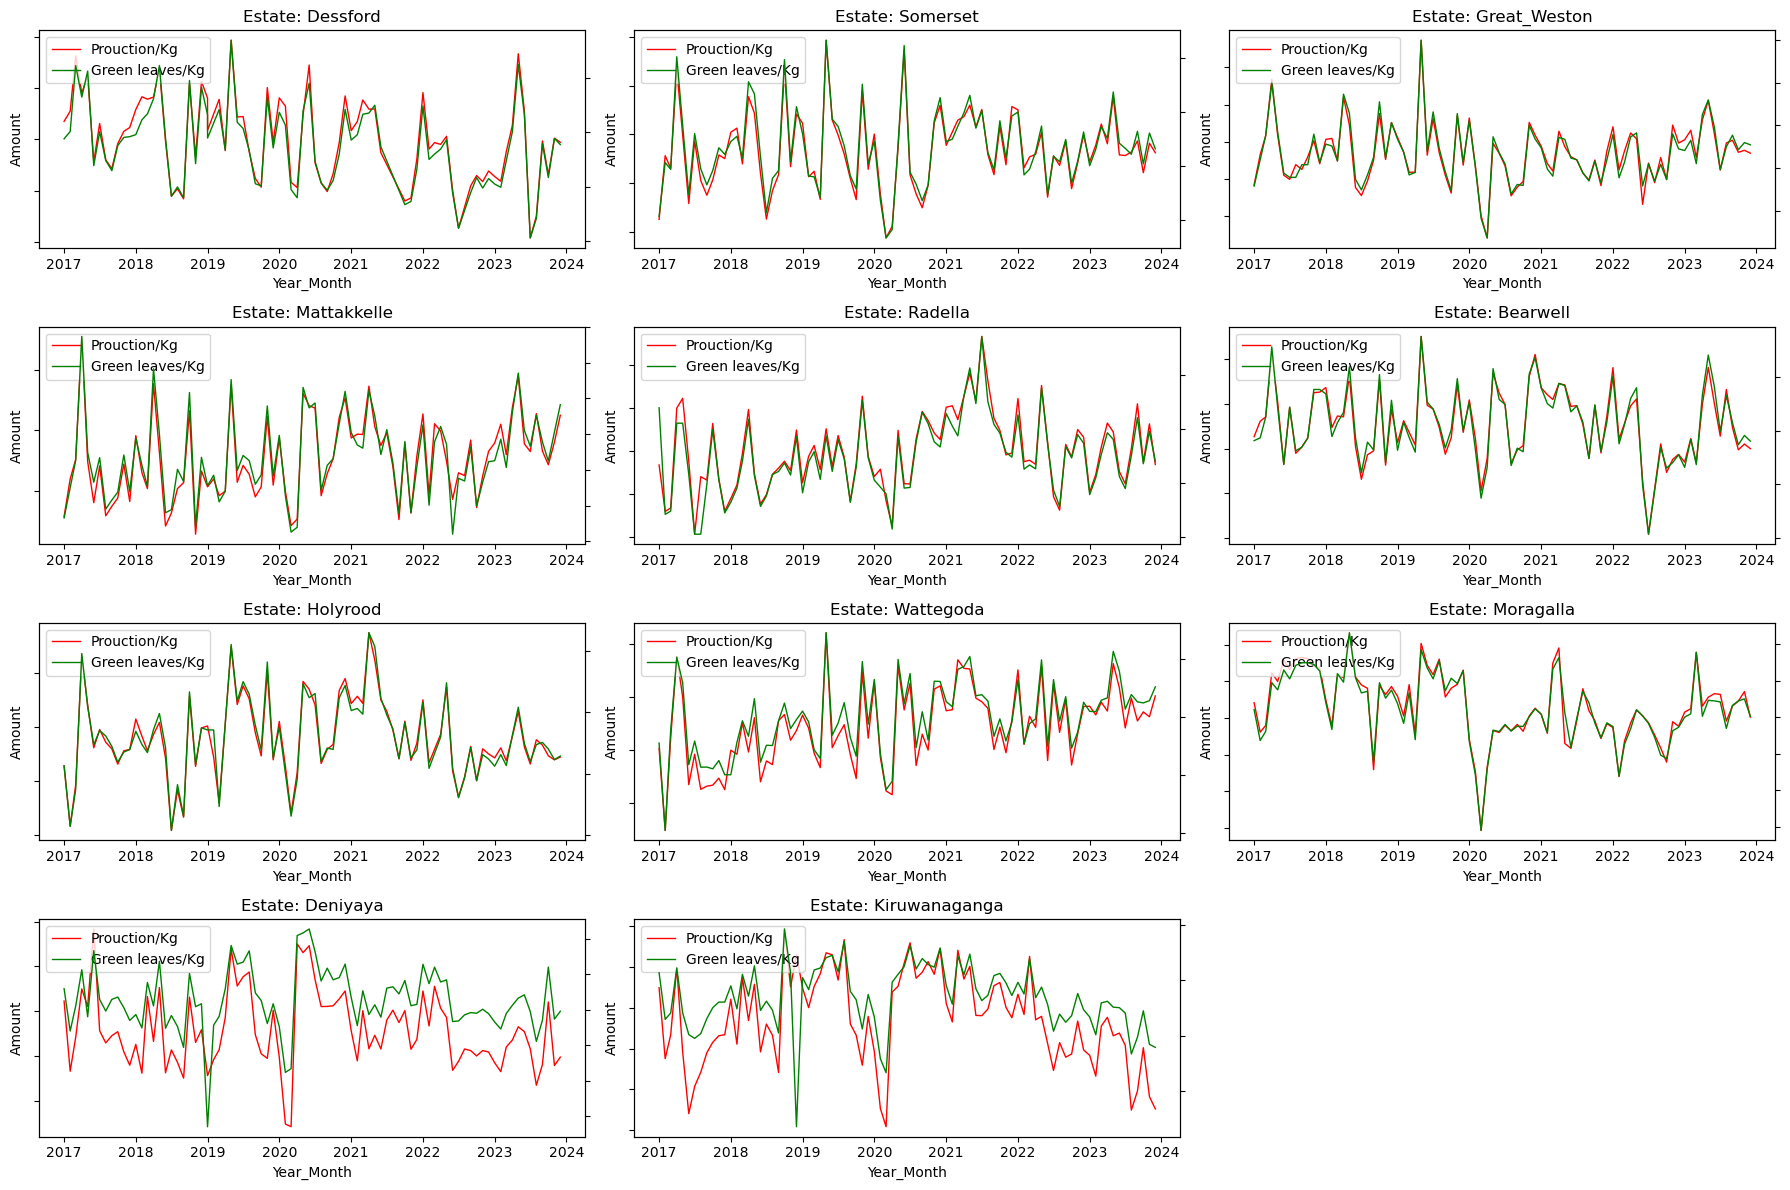

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'joined_clusters' is your DataFrame containing the merged data
# Assuming 'Production/Kg' is a column in 'joined_clusters' representing output
# Assuming 'Green_Leaves' is a column in 'joined_clusters' representing green leaves amount
# Assuming 'year' is a column in 'joined_clusters' representing the year

# Get unique estate names in cluster 1
estate_names = df1['Estate'].unique()

# Calculate number of rows and columns for the grid
num_rows = 4
num_cols = 3
num_plots = num_rows * num_cols

# Plot each estate separately
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 12))

for idx, estate in enumerate(estate_names):
    # Calculate row and column indices for the current plot
    row = idx // num_cols
    col = idx % num_cols
    
    # Filter data for the current estate
    estate_data = df1[df1['Estate'] == estate]
    
    # Plot production data
    ax1 = axs[row, col]
    ax1.plot(estate_data['Year_Month'], estate_data['Prouction/Kg'], label='Prouction/Kg', color='red', linewidth=1)
    ax1.set_xlabel('Year_Month')
    ax1.set_ylabel('Amount', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_title(f'Estate: {estate}')
    
    # Create a twin axis for green leaves amount
    ax2 = ax1.twinx()
    ax2.plot(estate_data['Year_Month'], estate_data['Green leaves/Kg'], label='Green leaves/Kg', color='green', linewidth=1)
    #ax2.set_ylabel('Green leaves/Kg', color='black')
    #ax2.tick_params(axis='y', labelcolor='black')
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # Hide y-axis values
    ax1.set_yticklabels([])
    ax2.set_yticklabels([])

# Hide empty subplots
for idx in range(len(estate_names), num_plots):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


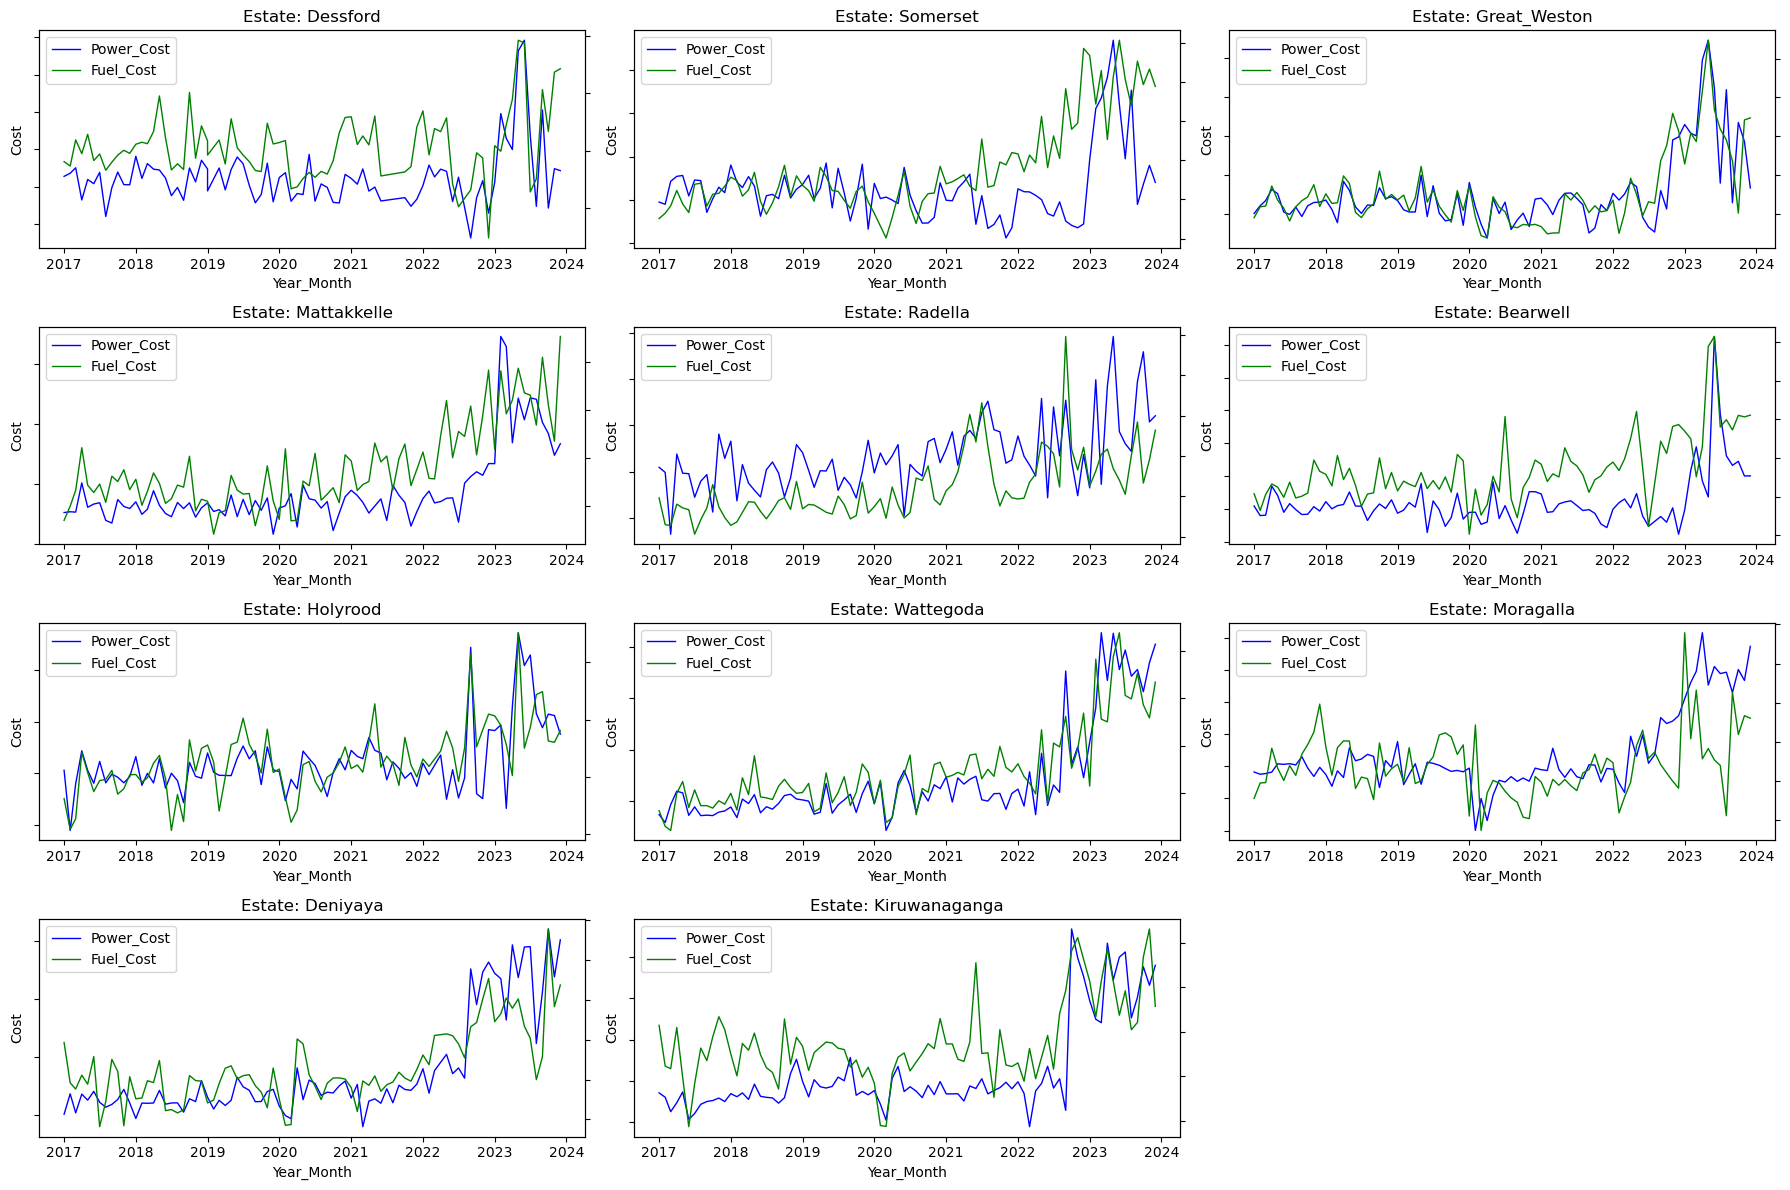

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'joined_clusters' is your DataFrame containing the merged data
# Assuming 'Production/Kg' is a column in 'joined_clusters' representing output
# Assuming 'Green_Leaves' is a column in 'joined_clusters' representing green leaves amount
# Assuming 'year' is a column in 'joined_clusters' representing the year

# Get unique estate names in cluster 1
estate_names = df1['Estate'].unique()

# Calculate number of rows and columns for the grid
num_rows = 4
num_cols = 3
num_plots = num_rows * num_cols

# Plot each estate separately
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 12))

for idx, estate in enumerate(estate_names):
    # Calculate row and column indices for the current plot
    row = idx // num_cols
    col = idx % num_cols
    
    # Filter data for the current estate
    estate_data = df1[df1['Estate'] == estate]
    
    # Plot production data
    ax1 = axs[row, col]
    ax1.plot(estate_data['Year_Month'], estate_data['Power_Cost'], label='Power_Cost', color='blue', linewidth=1)
    ax1.set_xlabel('Year_Month')
    ax1.set_ylabel('Cost', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_title(f'Estate: {estate}')
    
    # Create a twin axis for green leaves amount
    ax2 = ax1.twinx()
    ax2.plot(estate_data['Year_Month'], estate_data['Fuel_Cost'], label='Fuel_Cost', color='green', linewidth=1)
    #ax2.set_ylabel('Fuel_Cost', color='black')
    #ax2.tick_params(axis='y', labelcolor='black')
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    # Hide y-axis values
    ax1.set_yticklabels([])
    ax2.set_yticklabels([])

# Hide empty subplots
for idx in range(len(estate_names), num_plots):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


In [21]:
# Function to map categorical values to numeric values
def map_efficiency_factor(value):
    mapping = {'High': 3, 'Moderate': 2, 'Low': 1}
    return mapping.get(value, value)  # Return the original value if not found in mapping

# Apply the function to each value in the efficiency_factor column
df1['efficiency_factor_numeric'] = df1['efficiency_factor'].apply(map_efficiency_factor)

print(df1)

     Year Month Year_Month         Estate  Green leaves/Kg    kVA     KWhr  \
0    2017   Jan 2017-01-01       Dessford         188183.0  156.0  34341.0   
1    2017   Jan 2017-01-01       Somerset         106682.0  120.0  21937.0   
2    2017   Jan 2017-01-01   Great_Weston         157284.0  120.0  30061.0   
3    2017   Jan 2017-01-01    Mattakkelle         132732.0  136.0  26444.0   
4    2017   Jan 2017-01-01        Radella         119621.0  115.0  42500.0   
..    ...   ...        ...            ...              ...    ...      ...   
919  2023   Dec 2023-12-01       Holyrood         129011.0  103.0  28477.0   
920  2023   Dec 2023-12-01      Wattegoda         252133.0  131.0  45232.0   
921  2023   Dec 2023-12-01      Moragalla         100593.0   86.0  20719.0   
922  2023   Dec 2023-12-01       Deniyaya         197940.0  148.0  43121.0   
923  2023   Dec 2023-12-01  Kiruwanaganga         179009.0  127.0  47826.0   

     Power_Cost    cum  Fuel_Cost  Labour days  Prouction/Kg  O

In [22]:
# import pandas as pd

# # Assuming 'df1' is your DataFrame containing the given dataset

# # Initialize dictionaries to store counts and percentages for each month
# counts_by_month = {}
# percentages_by_month = {}

# # Group the data by 'Month' and 'Year'
# grouped_data = df1.groupby(['Year', 'Month'])

# # Loop through each unique combination of 'Year' and 'Month'
# for (year, month), month_data in grouped_data:
    
#     # Count the number of estates in each category for the current month
#     category_counts = month_data['efficiency_factor'].value_counts()
    
#     # Calculate the total number of estates for the current month
#     total_estates = len(month_data)
    
#     # Calculate the percentage of estates in each category for the current month
#     category_percentages = (category_counts / total_estates) * 100
    
#     # Store counts and percentages for the current month
#     counts_by_month[(year, month)] = category_counts
#     percentages_by_month[(year, month)] = category_percentages

# # Display the counts and percentages for each month
# for month, counts in counts_by_month.items():
#     print(f"\nCounts of Estates by Efficiency Category for {month}:")
#     print(counts)
    
# for month, percentages in percentages_by_month.items():
#     print(f"\nPercentages of Estates by Efficiency Category for {month}:")
#     print(percentages)



In [23]:

# Group by 'Estate' and 'Year' and sum the 'Labour_Days' for each group
total_labour_days = df1.groupby(['Estate', 'Year'])['Labour days'].sum().reset_index()

print(total_labour_days)
total_labour_days.head()


       Estate  Year  Labour days
0    Bearwell  2017      18976.0
1    Bearwell  2018      15940.0
2    Bearwell  2019      19804.0
3    Bearwell  2020      18637.0
4    Bearwell  2021      17838.0
..        ...   ...          ...
72  Wattegoda  2019      17201.0
73  Wattegoda  2020      18975.0
74  Wattegoda  2021      20008.0
75  Wattegoda  2022      15864.0
76  Wattegoda  2023      34244.0

[77 rows x 3 columns]


,Estate,Year,Labour days
0,Bearwell,2017,18976.0
1,Bearwell,2018,15940.0
2,Bearwell,2019,19804.0
3,Bearwell,2020,18637.0
4,Bearwell,2021,17838.0


C:\Users\TTELIT0013\AppData\Local\Temp\ipykernel_5456\4129050564.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_estates)


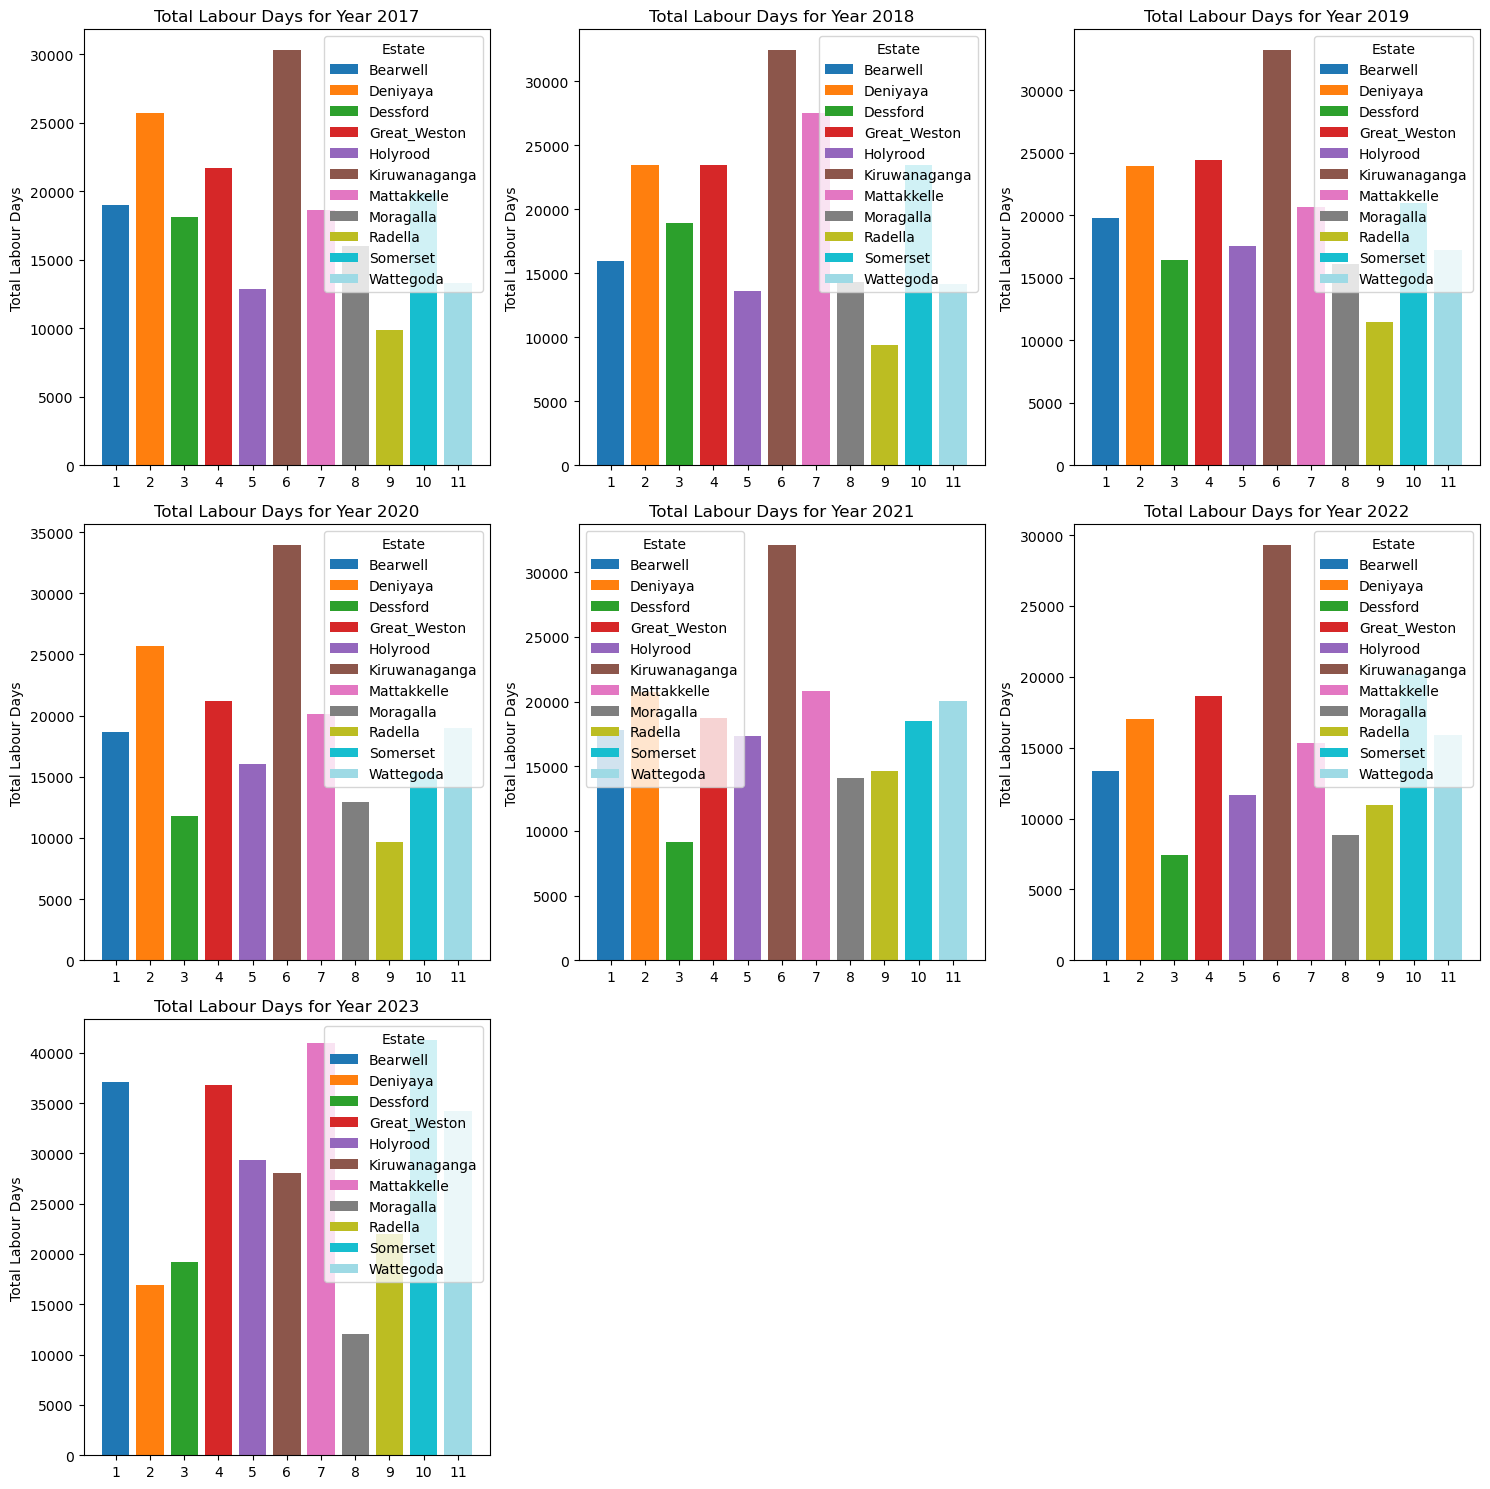

In [24]:
import matplotlib.pyplot as plt

# Plotting
num_years = total_labour_days['Year'].nunique()
num_estates = total_labour_days['Estate'].nunique()

# Create a color map for differentiating estates
colors = plt.cm.get_cmap('tab20', num_estates)

# Calculate the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3
num_plots = min(num_years, num_rows * num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over each year and plot in the corresponding subplot
for year_idx, year in enumerate(total_labour_days['Year'].unique()):
    if year_idx >= num_plots:
        break
    
    # Calculate the row and column indices for the subplot
    row = year_idx // num_cols
    col = year_idx % num_cols
    
    # Filter data for the current year
    year_data = total_labour_days[total_labour_days['Year'] == year]
    
    # Plotting for the current year
    ax = axes[row, col]
    
    # Iterate over each estate
    for idx, (estate, df1) in enumerate(year_data.groupby('Estate')):
        # Plot the bars for the current estate
        ax.bar(idx, df1['Labour days'].iloc[0], color=colors(idx), label=estate)

    # Set x-ticks and labels
    ax.set_xticks(range(num_estates))
    ax.set_xticklabels(range(1, num_estates + 1))  # Set custom x-axis labels from 1 to 11
    
    # Set y-label
    ax.set_ylabel('Total Labour Days')
    
    # Set title
    ax.set_title(f'Total Labour Days for Year {year}')
    
    # Add legend
    ax.legend(title='Estate')

# Remove empty subplots
for idx in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

# Show plot
plt.tight_layout()
plt.show()


# Time Series Clustering

## Electricity

In [25]:
dfn=df_cleaned.copy()
dfn.head()

,Year,Month,Year_Month,Estate,Green leaves/Kg,kVA,KWhr,Power_Cost,cum,Fuel_Cost,Labour days,Prouction/Kg,Output_power,Output_fuel,Region,Efficiency_1,Efficiency_2,efficiency_factor
0,2017,Jan,2017-01,Dessford,188183.0,156.0,34341.0,637469.0,178.0,404295.0,1426.0,47011.0,1.368947,264.106742,High Grown,Satisfied,Satisfied,High
1,2017,Jan,2017-01,Somerset,106682.0,120.0,21937.0,475407.0,108.0,256374.0,1083.0,25061.0,1.142408,232.046296,High Grown,Unsatisfied,Satisfied,Moderate
2,2017,Jan,2017-01,Great_Weston,157284.0,120.0,30061.0,507779.0,179.0,449543.0,1439.0,36782.0,1.223579,205.486033,High Grown,Satisfied,Satisfied,High
3,2017,Jan,2017-01,Mattakkelle,132732.0,136.0,26444.0,524786.0,131.0,349996.0,1125.0,31525.0,1.192142,240.648855,High Grown,Unsatisfied,Satisfied,Moderate
4,2017,Jan,2017-01,Radella,119621.0,115.0,42500.0,546974.0,194.0,479705.0,969.0,16779.0,0.394800,86.489691,High Grown,Unsatisfied,Unsatisfied,Low


In [26]:
###Convert month into Datetime
dfn['Year_Month']=pd.to_datetime(dfn['Year_Month'])
dfn.head(10)

,Year,Month,Year_Month,Estate,Green leaves/Kg,kVA,KWhr,Power_Cost,cum,Fuel_Cost,Labour days,Prouction/Kg,Output_power,Output_fuel,Region,Efficiency_1,Efficiency_2,efficiency_factor
0,2017,Jan,2017-01-01,Dessford,188183.0,156.0,34341.0,637469.0,178.0,404295.0,1426.0,47011.0,1.368947,264.106742,High Grown,Satisfied,Satisfied,High
1,2017,Jan,2017-01-01,Somerset,106682.0,120.0,21937.0,475407.0,108.0,256374.0,1083.0,25061.0,1.142408,232.046296,High Grown,Unsatisfied,Satisfied,Moderate
2,2017,Jan,2017-01-01,Great_Weston,157284.0,120.0,30061.0,507779.0,179.0,449543.0,1439.0,36782.0,1.223579,205.486033,High Grown,Satisfied,Satisfied,High
3,2017,Jan,2017-01-01,Mattakkelle,132732.0,136.0,26444.0,524786.0,131.0,349996.0,1125.0,31525.0,1.192142,240.648855,High Grown,Unsatisfied,Satisfied,Moderate
4,2017,Jan,2017-01-01,Radella,119621.0,115.0,42500.0,546974.0,194.0,479705.0,969.0,16779.0,0.394800,86.489691,High Grown,Unsatisfied,Unsatisfied,Low
5,2017,Jan,2017-01-01,Bearwell,181473.0,122.0,31037.0,546899.0,193.0,539209.0,1171.0,45381.0,1.462158,235.134715,High Grown,Satisfied,Satisfied,High
6,2017,Jan,2017-01-01,Holyrood,112992.0,132.0,26400.0,530000.0,126.0,310727.0,1008.0,25600.0,0.969697,203.174603,High Grown,Unsatisfied,Satisfied,Moderate
7,2017,Jan,2017-01-01,Wattegoda,154883.0,115.0,27686.0,370594.0,126.0,319068.0,1248.0,40688.0,1.469624,322.920635,High Grown,Satisfied,Satisfied,High
8,2017,Jan,2017-01-01,Moragalla,105104.0,104.0,22665.0,364752.0,107.0,155289.0,1322.0,22093.0,0.974763,206.476635,Low grown,Unsatisfied,Satisfied,Moderate
9,2017,Jan,2017-01-01,Deniyaya,229603.0,139.0,41265.0,504470.0,294.0,585502.0,2367.0,52258.0,1.266400,177.748299,Low grown,Satisfied,Unsatisfied,Moderate


In [27]:
dfn.dtypes

Year                          int64
Month                        object
Year_Month           datetime64[ns]
Estate                       object
Green leaves/Kg             float64
kVA                         float64
KWhr                        float64
Power_Cost                  float64
cum                         float64
Fuel_Cost                   float64
Labour days                 float64
Prouction/Kg                float64
Output_power                float64
Output_fuel                 float64
Region                       object
Efficiency_1                 object
Efficiency_2                 object
efficiency_factor            object
dtype: object

In [28]:
dfn.isna().sum()

Year                 0
Month                0
Year_Month           0
Estate               0
Green leaves/Kg      0
kVA                  0
KWhr                 0
Power_Cost           0
cum                  0
Fuel_Cost            0
Labour days          0
Prouction/Kg         0
Output_power         0
Output_fuel          0
Region               0
Efficiency_1         0
Efficiency_2         0
efficiency_factor    0
dtype: int64

In [29]:
# Select the desired columns
Production = dfn[['Output_power', 'Year_Month', 'Estate']]

# Drop rows with missing values
#violent_per_100k = violent_per_100k.dropna()

# Display information about the DataFrame
print(Production.info())
Production.head()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 923
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Output_power  917 non-null    float64       
 1   Year_Month    917 non-null    datetime64[ns]
 2   Estate        917 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 28.7+ KB
None


,Output_power,Year_Month,Estate
0,1.368947,2017-01-01,Dessford
1,1.142408,2017-01-01,Somerset
2,1.223579,2017-01-01,Great_Weston
3,1.192142,2017-01-01,Mattakkelle
4,0.394800,2017-01-01,Radella


In [30]:
Production.isnull().values.any()

False

In [31]:
# Assuming you have the DataFrame 'violent_per_100k' from the previous step

# Pivot the DataFrame to spread department_name values as columns
spread_Estatewise = Production.pivot_table(index='Year_Month', columns='Estate', values='Output_power')

# Display information about the resulting DataFrame
print(spread_Estatewise.info())
spread_Estatewise.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2017-01-01 to 2023-12-01
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bearwell       83 non-null     float64
 1   Deniyaya       84 non-null     float64
 2   Dessford       79 non-null     float64
 3   Great_Weston   84 non-null     float64
 4   Holyrood       82 non-null     float64
 5   Kiruwanaganga  84 non-null     float64
 6   Mattakkelle    84 non-null     float64
 7   Moragalla      84 non-null     float64
 8   Radella        84 non-null     float64
 9   Somerset       84 non-null     float64
 10  Wattegoda      84 non-null     float64
dtypes: float64(11)
memory usage: 7.9 KB
None


Estate,Bearwell,Deniyaya,Dessford,Great_Weston,Holyrood,Kiruwanaganga,Mattakkelle,Moragalla,Radella,Somerset,Wattegoda
Year_Month,,,,,,,,,,,
2017-01-01,1.462158,1.266400,1.368947,1.223579,0.969697,1.154243,1.192142,0.974763,0.394800,1.142408,1.469624
2017-02-01,1.686118,0.861197,1.529394,1.526879,1.048036,1.042807,1.428432,1.078057,0.860546,1.970518,0.975679
2017-03-01,1.504607,1.136980,1.317087,1.468704,1.549685,1.112993,1.283482,0.976090,0.856165,1.369380,1.559798
2017-04-01,1.656349,1.389194,1.209325,1.773833,1.504082,1.406153,1.429477,1.309477,0.895404,1.725544,1.798690
2017-05-01,1.425356,1.326154,1.169077,1.459615,1.295962,1.076039,1.181338,1.113784,1.009150,1.728967,1.446972


In [32]:
spread_Estatewise.isnull().values.any()

True

In [33]:
#Missing counts
spread_Estatewise.isna().sum()

Estate
Bearwell         1
Deniyaya         0
Dessford         5
Great_Weston     0
Holyrood         2
Kiruwanaganga    0
Mattakkelle      0
Moragalla        0
Radella          0
Somerset         0
Wattegoda        0
dtype: int64

In [34]:
#spread_Estatewise.to_csv('F:/4th yr/4.2/ICDT/Electricity Estatewise.csv', index=False)

## Check the Stationary

In [35]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller



# Handle missing values by filling them with column means
spread_Estatewise.fillna(spread_Estatewise.mean(), inplace=True)

# Check for missing or infinite values in each estate's data and perform ADF test
for estate in spread_Estatewise.columns:
    estate_data = spread_Estatewise[estate]
    if estate_data.isnull().sum() > 0 or np.isinf(estate_data).sum() > 0:
        print("{} data contains missing or infinite values.".format(estate))
    else:
        result = adfuller(estate_data)
        p_value = result[1]
        if p_value <= 0.05:
            print("{} data is Stationary (p-value: {:.4f})".format(estate, p_value))
        else:
            print("{} data is Non Stationary (p-value: {:.4f})".format(estate, p_value))


Bearwell data is Stationary (p-value: 0.0000)
Deniyaya data is Stationary (p-value: 0.0000)
Dessford data is Stationary (p-value: 0.0000)
Great_Weston data is Stationary (p-value: 0.0000)
Holyrood data is Stationary (p-value: 0.0000)
Kiruwanaganga data is Stationary (p-value: 0.0000)
Mattakkelle data is Stationary (p-value: 0.0000)
Moragalla data is Stationary (p-value: 0.0000)
Radella data is Stationary (p-value: 0.0000)
Somerset data is Stationary (p-value: 0.0002)
Wattegoda data is Stationary (p-value: 0.0000)


Year_Month     2017-01-01  2017-02-01  2017-03-01  2017-04-01  2017-05-01  \
Estate                                                                      
Bearwell         1.462158    1.686118    1.504607    1.656349    1.425356   
Deniyaya         1.266400    0.861197    1.136980    1.389194    1.326154   
Dessford         1.368947    1.529394    1.317087    1.209325    1.169077   
Great_Weston     1.223579    1.526879    1.468704    1.773833    1.459615   
Holyrood         0.969697    1.048036    1.549685    1.504082    1.295962   
Kiruwanaganga    1.154243    1.042807    1.112993    1.406153    1.076039   
Mattakkelle      1.192142    1.428432    1.283482    1.429477    1.181338   
Moragalla        0.974763    1.078057    0.976090    1.309477    1.113784   
Radella          0.394800    0.860546    0.856165    0.895404    1.009150   
Somerset         1.142408    1.970518    1.369380    1.725544    1.728967   
Wattegoda        1.469624    0.975679    1.559798    1.798690    1.446972   

C:\Users\TTELIT0013\AppData\Local\Temp\ipykernel_5456\2674898059.py:35: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  fit = linkage(outputs_dist, method='average')


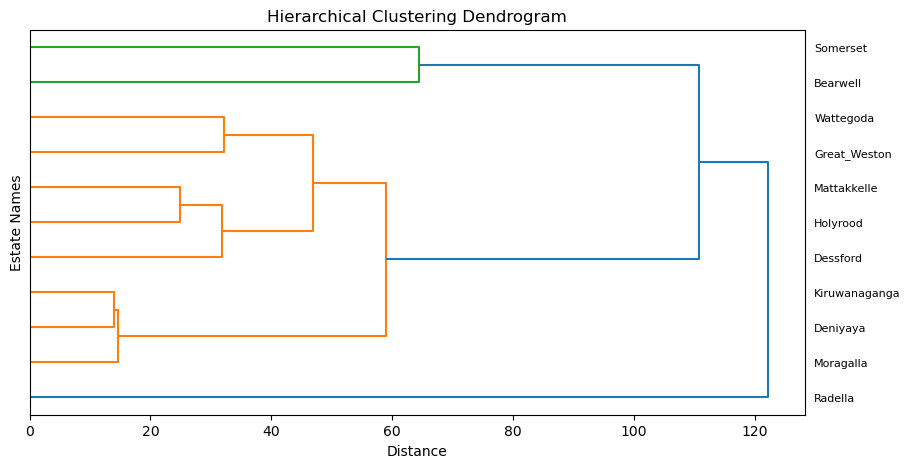

In [36]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from fastdtw import fastdtw  # You need to install the fastdtw package

output = spread_Estatewise.iloc[:, :].T
print(output)
# Fill missing values with the mean of each column
output_filled = output.fillna(output.mean())

# Define a function to calculate DTW distance between two time series
def dtw_distance(x, y):
    distance, _ = fastdtw(x, y)
    return distance

# Calculate the DTW distance matrix
outputs_dist = squareform(pdist(output_filled, metric=dtw_distance))

# import numpy as np
# import pandas as pd
# from scipy.spatial.distance import pdist, squareform
# from scipy.cluster.hierarchy import linkage, dendrogram
# import matplotlib.pyplot as plt

# output = spread_Estatewise.iloc[:, :].T
# print(output)
# # Fill missing values with the mean of each column
# output_filled = output.fillna(output.mean())

# # Calculate the Euclidean distance matrix
# outputs_dist = squareform(pdist(output_filled, metric='euclidean'))

# # Perform hierarchical clustering
fit = linkage(outputs_dist, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(fit, leaf_rotation=0, leaf_font_size=8, orientation='left', labels=spread_Estatewise.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Estate Names')
plt.gca().invert_xaxis()  # Invert x-axis to have labels on the left

# # Draw rectangles around clusters (assuming k=4)
# rects = {}
# for i in range(5):
#     idxs = np.where(fit[:, 2] >= fit[-5 + i, 2])
#     ymin, ymax = plt.ylim()
#     for idx in idxs[0]:
#         rect = plt.Rectangle((ymin, idx - 0.5), ymax - ymin, 1, facecolor='cadetblue', alpha=0.3)
#         rects[idx] = rect
#         plt.gca().add_patch(rect)   

plt.show()


In [37]:
import pandas as pd
from scipy.cluster.hierarchy import cut_tree
# Assuming 'spread_homs_per_100k' is your DataFrame containing the spread homicides data
# Assuming 'ucr_crime_1975_2015' is your original DataFrame

# Create df with the same department names as spread_homs_per_100k
#df = pd.DataFrame({'department_name': spread_homs_per_100k.columns[1:]})

# Merge clusters into full dataset
clustered_data = cut_tree(fit, n_clusters=3).flatten()
clustered_data_tidy = pd.DataFrame({'Estate': spread_Estatewise.columns[:], 'cluster': clustered_data})
clustered_data_tidy['Estate'] = clustered_data_tidy['Estate'].astype(str)

# Merge with original data
joined_clusters = pd.merge(dfn, clustered_data_tidy, on='Estate')

# Display the result
joined_clusters.head()

,Year,Month,Year_Month,Estate,Green leaves/Kg,kVA,KWhr,Power_Cost,cum,Fuel_Cost,Labour days,Prouction/Kg,Output_power,Output_fuel,Region,Efficiency_1,Efficiency_2,efficiency_factor,cluster
0,2017,Jan,2017-01-01,Dessford,188183.0,156.0,34341.0,637469.0,178.0,404295.0,1426.0,47011.0,1.368947,264.106742,High Grown,Satisfied,Satisfied,High,1
1,2017,Feb,2017-02-01,Dessford,201482.0,154.0,33340.0,679081.0,157.0,365947.0,935.0,50990.0,1.529394,324.777070,High Grown,Satisfied,Satisfied,High,1
2,2017,Mar,2017-03-01,Dessford,322462.0,161.0,55048.0,752375.0,261.0,594613.0,2068.0,72503.0,1.317087,277.789272,High Grown,Satisfied,Satisfied,High,1
3,2017,Apr,2017-04-01,Dessford,264633.0,168.0,47978.0,321436.0,219.0,474032.0,1888.0,58021.0,1.209325,264.936073,High Grown,Satisfied,Satisfied,High,1
4,2017,May,2017-05-01,Dessford,312337.0,152.0,55466.0,595718.0,279.0,643118.0,2236.0,64844.0,1.169077,232.415771,High Grown,Unsatisfied,Satisfied,Moderate,1


In [38]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_score


# Extracting cluster labels from the clustered data
cluster_labels = clustered_data_tidy['cluster']

# Calculate silhouette score
silhouette = silhouette_score(output_filled, cluster_labels)
print("Silhouette Score:", silhouette)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(output_filled, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(output_filled, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.21012220036162665
Calinski-Harabasz Index: 4.815523018128055
Davies-Bouldin Index: 0.7968024764215281


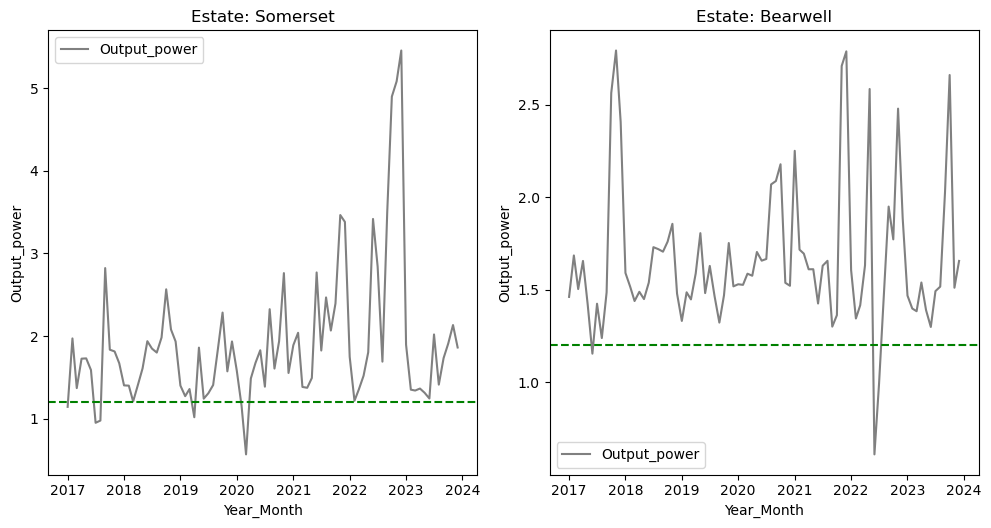

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'joined_clusters' is your DataFrame containing the merged data
# Assuming 'Production/Kg' is a column in 'joined_clusters' representing output
# Assuming 'year' is a column in 'joined_clusters' representing the year

# Filter data for cluster 1
cluster1 = joined_clusters[joined_clusters['cluster'] == 0]

# Get unique estate names in cluster 1
estate_names = cluster1['Estate'].unique()

# Calculate the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3
num_plots = min(len(estate_names), num_rows * num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Plot each estate separately
for idx, estate in enumerate(estate_names[:num_plots]):
    # Calculate the row and column indices for the subplot
    row = idx // num_cols
    col = idx % num_cols
    
    # Filter data for the current estate
    estate_data = cluster1[cluster1['Estate'] == estate]
    
#     # Calculate the rolling mean(Moving Average)
#     rolling_mean = estate_data['Output_power'].rolling(window=3, min_periods=3).mean()
    
    # Plot on the corresponding subplot
    axes[row, col].plot(estate_data['Year_Month'], estate_data['Output_power'], label='Output_power', color='grey')
#     axes[row, col].plot(estate_data['Year_Month'], rolling_mean, label='Smoothed', color='red')
    axes[row, col].set_xlabel('Year_Month')
    axes[row, col].set_ylabel('Output_power')
    axes[row, col].set_title(f'Estate: {estate}')
    axes[row, col].legend()
    
    # Add a horizontal dotted line at y=1.2Kg/unit
    axes[row, col].axhline(y=1.2, color='green', linestyle='--')
    #axes[row, col].set_ylim(20, 500)

# Remove empty subplots
for idx in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()


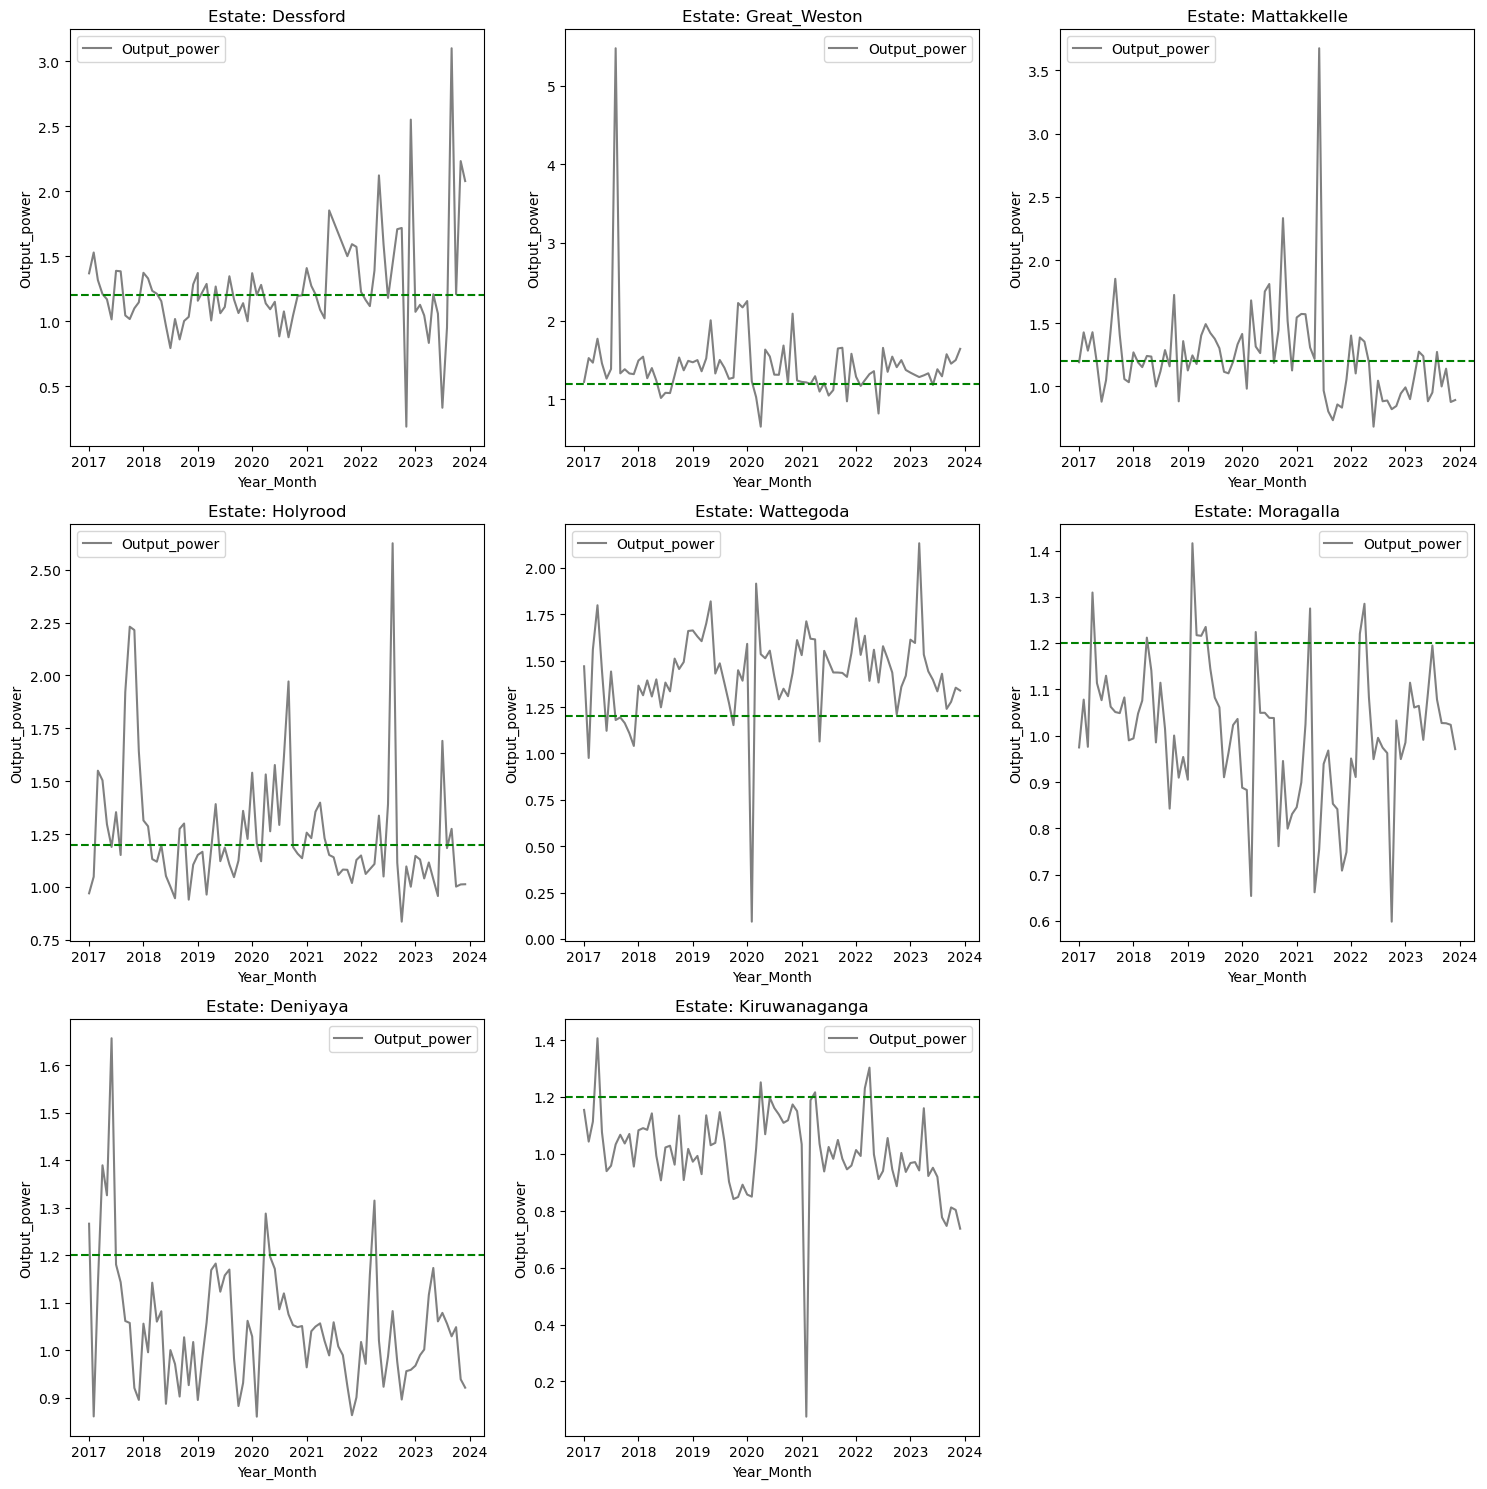

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'joined_clusters' is your DataFrame containing the merged data
# Assuming 'Production/Kg' is a column in 'joined_clusters' representing output
# Assuming 'year' is a column in 'joined_clusters' representing the year

# Filter data for cluster 1
cluster2 = joined_clusters[joined_clusters['cluster'] == 1]

# Get unique estate names in cluster 1
estate_names = cluster2['Estate'].unique()

# Calculate the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3
num_plots = min(len(estate_names), num_rows * num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Plot each estate separately
for idx, estate in enumerate(estate_names[:num_plots]):
    # Calculate the row and column indices for the subplot
    row = idx // num_cols
    col = idx % num_cols
    
    # Filter data for the current estate
    estate_data = cluster2[cluster2['Estate'] == estate]
    
#     # Calculate the rolling mean(Moving Average)
#     rolling_mean = estate_data['Output_power'].rolling(window=3, min_periods=3).mean()
    
    
    # Plot on the corresponding subplot
    axes[row, col].plot(estate_data['Year_Month'], estate_data['Output_power'], label='Output_power', color='grey')
#     axes[row, col].plot(estate_data['Year_Month'], rolling_mean, label='Smoothed', color='red')
    axes[row, col].set_xlabel('Year_Month')
    axes[row, col].set_xlabel('Year_Month')
    axes[row, col].set_ylabel('Output_power')
    axes[row, col].set_title(f'Estate: {estate}')
    axes[row, col].legend()
    
    # Add a horizontal dotted line at y=1.2Kg/unit
    axes[row, col].axhline(y=1.2, color='green', linestyle='--')
    #axes[row, col].set_ylim(20, 500)

# Remove empty subplots
for idx in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

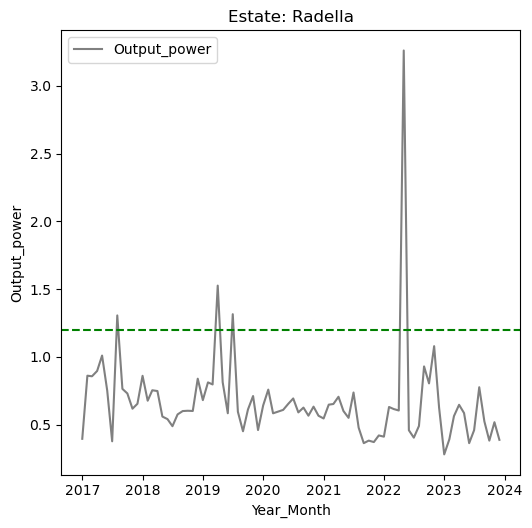

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'joined_clusters' is your DataFrame containing the merged data
# Assuming 'Production/Kg' is a column in 'joined_clusters' representing output
# Assuming 'year' is a column in 'joined_clusters' representing the year

# Filter data for cluster 1
cluster3 = joined_clusters[joined_clusters['cluster'] == 2]

# Get unique estate names in cluster 1
estate_names = cluster3['Estate'].unique()

# Calculate the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3
num_plots = min(len(estate_names), num_rows * num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Plot each estate separately
for idx, estate in enumerate(estate_names[:num_plots]):
    # Calculate the row and column indices for the subplot
    row = idx // num_cols
    col = idx % num_cols
    
    # Filter data for the current estate
    estate_data = cluster3[cluster3['Estate'] == estate]
    
    # Plot on the corresponding subplot
    axes[row, col].plot(estate_data['Year_Month'], estate_data['Output_power'], label='Output_power', color='grey')
    axes[row, col].set_xlabel('Year_Month')
    axes[row, col].set_ylabel('Output_power')
    axes[row, col].set_title(f'Estate: {estate}')
    axes[row, col].legend()
    
    # Add a horizontal dotted line at y=1.2Kg/unit
    axes[row, col].axhline(y=1.2, color='green', linestyle='--')
    #axes[row, col].set_ylim(20, 500)

# Remove empty subplots
for idx in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()

## Fuel_wood

In [42]:
dff=df_cleaned.copy()
dff.head()

,Year,Month,Year_Month,Estate,Green leaves/Kg,kVA,KWhr,Power_Cost,cum,Fuel_Cost,Labour days,Prouction/Kg,Output_power,Output_fuel,Region,Efficiency_1,Efficiency_2,efficiency_factor
0,2017,Jan,2017-01,Dessford,188183.0,156.0,34341.0,637469.0,178.0,404295.0,1426.0,47011.0,1.368947,264.106742,High Grown,Satisfied,Satisfied,High
1,2017,Jan,2017-01,Somerset,106682.0,120.0,21937.0,475407.0,108.0,256374.0,1083.0,25061.0,1.142408,232.046296,High Grown,Unsatisfied,Satisfied,Moderate
2,2017,Jan,2017-01,Great_Weston,157284.0,120.0,30061.0,507779.0,179.0,449543.0,1439.0,36782.0,1.223579,205.486033,High Grown,Satisfied,Satisfied,High
3,2017,Jan,2017-01,Mattakkelle,132732.0,136.0,26444.0,524786.0,131.0,349996.0,1125.0,31525.0,1.192142,240.648855,High Grown,Unsatisfied,Satisfied,Moderate
4,2017,Jan,2017-01,Radella,119621.0,115.0,42500.0,546974.0,194.0,479705.0,969.0,16779.0,0.394800,86.489691,High Grown,Unsatisfied,Unsatisfied,Low


In [43]:
###Convert month into Datetime
dff['Year_Month']=pd.to_datetime(dff['Year_Month'])
dff.head(10)

,Year,Month,Year_Month,Estate,Green leaves/Kg,kVA,KWhr,Power_Cost,cum,Fuel_Cost,Labour days,Prouction/Kg,Output_power,Output_fuel,Region,Efficiency_1,Efficiency_2,efficiency_factor
0,2017,Jan,2017-01-01,Dessford,188183.0,156.0,34341.0,637469.0,178.0,404295.0,1426.0,47011.0,1.368947,264.106742,High Grown,Satisfied,Satisfied,High
1,2017,Jan,2017-01-01,Somerset,106682.0,120.0,21937.0,475407.0,108.0,256374.0,1083.0,25061.0,1.142408,232.046296,High Grown,Unsatisfied,Satisfied,Moderate
2,2017,Jan,2017-01-01,Great_Weston,157284.0,120.0,30061.0,507779.0,179.0,449543.0,1439.0,36782.0,1.223579,205.486033,High Grown,Satisfied,Satisfied,High
3,2017,Jan,2017-01-01,Mattakkelle,132732.0,136.0,26444.0,524786.0,131.0,349996.0,1125.0,31525.0,1.192142,240.648855,High Grown,Unsatisfied,Satisfied,Moderate
4,2017,Jan,2017-01-01,Radella,119621.0,115.0,42500.0,546974.0,194.0,479705.0,969.0,16779.0,0.394800,86.489691,High Grown,Unsatisfied,Unsatisfied,Low
5,2017,Jan,2017-01-01,Bearwell,181473.0,122.0,31037.0,546899.0,193.0,539209.0,1171.0,45381.0,1.462158,235.134715,High Grown,Satisfied,Satisfied,High
6,2017,Jan,2017-01-01,Holyrood,112992.0,132.0,26400.0,530000.0,126.0,310727.0,1008.0,25600.0,0.969697,203.174603,High Grown,Unsatisfied,Satisfied,Moderate
7,2017,Jan,2017-01-01,Wattegoda,154883.0,115.0,27686.0,370594.0,126.0,319068.0,1248.0,40688.0,1.469624,322.920635,High Grown,Satisfied,Satisfied,High
8,2017,Jan,2017-01-01,Moragalla,105104.0,104.0,22665.0,364752.0,107.0,155289.0,1322.0,22093.0,0.974763,206.476635,Low grown,Unsatisfied,Satisfied,Moderate
9,2017,Jan,2017-01-01,Deniyaya,229603.0,139.0,41265.0,504470.0,294.0,585502.0,2367.0,52258.0,1.266400,177.748299,Low grown,Satisfied,Unsatisfied,Moderate


In [44]:
# Select the desired columns
Production1 = dff[['Output_fuel', 'Year_Month', 'Estate']]

# Drop rows with missing values
#violent_per_100k = violent_per_100k.dropna()

# Display information about the DataFrame
print(Production1.info())
Production1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 923
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Output_fuel  917 non-null    float64       
 1   Year_Month   917 non-null    datetime64[ns]
 2   Estate       917 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 28.7+ KB
None


,Output_fuel,Year_Month,Estate
0,264.106742,2017-01-01,Dessford
1,232.046296,2017-01-01,Somerset
2,205.486033,2017-01-01,Great_Weston
3,240.648855,2017-01-01,Mattakkelle
4,86.489691,2017-01-01,Radella


In [45]:
# Assuming you have the DataFrame 'violent_per_100k' from the previous step

# Pivot the DataFrame to spread department_name values as columns
spread_Estatewise1 = Production1.pivot_table(index='Year_Month', columns='Estate', values='Output_fuel')

# Display information about the resulting DataFrame
print(spread_Estatewise1.info())
spread_Estatewise1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2017-01-01 to 2023-12-01
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bearwell       83 non-null     float64
 1   Deniyaya       84 non-null     float64
 2   Dessford       79 non-null     float64
 3   Great_Weston   84 non-null     float64
 4   Holyrood       82 non-null     float64
 5   Kiruwanaganga  84 non-null     float64
 6   Mattakkelle    84 non-null     float64
 7   Moragalla      84 non-null     float64
 8   Radella        84 non-null     float64
 9   Somerset       84 non-null     float64
 10  Wattegoda      84 non-null     float64
dtypes: float64(11)
memory usage: 7.9 KB
None


Estate,Bearwell,Deniyaya,Dessford,Great_Weston,Holyrood,Kiruwanaganga,Mattakkelle,Moragalla,Radella,Somerset,Wattegoda
Year_Month,,,,,,,,,,,
2017-01-01,235.134715,177.748299,264.106742,205.486033,203.174603,130.543260,240.648855,206.476635,86.489691,232.046296,322.920635
2017-02-01,405.426357,135.533333,324.777070,221.308333,230.642857,127.144385,228.489583,223.024691,134.636364,379.244444,302.125000
2017-03-01,285.368421,211.320574,277.789272,222.669014,329.446429,158.362018,206.356557,201.946809,164.780488,259.988701,337.613636
2017-04-01,296.820144,191.529617,264.936073,286.211009,227.896907,156.438479,246.365854,201.407692,139.069444,349.443548,347.967742
2017-05-01,278.191781,245.408654,232.415771,226.985714,215.896861,161.229508,169.511945,198.412698,143.626667,324.228261,241.638554


In [46]:
#Missing counts
spread_Estatewise1.isna().sum()

Estate
Bearwell         1
Deniyaya         0
Dessford         5
Great_Weston     0
Holyrood         2
Kiruwanaganga    0
Mattakkelle      0
Moragalla        0
Radella          0
Somerset         0
Wattegoda        0
dtype: int64

In [47]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller



# Handle missing values by filling them with column means
spread_Estatewise1.fillna(spread_Estatewise1.mean(), inplace=True)

# Check for missing or infinite values in each estate's data and perform ADF test
for estate in spread_Estatewise1.columns:
    estate_data = spread_Estatewise1[estate]
    if estate_data.isnull().sum() > 0 or np.isinf(estate_data).sum() > 0:
        print("{} data contains missing or infinite values.".format(estate))
    else:
        result = adfuller(estate_data)
        p_value = result[1]
        if p_value <= 0.05:
            print("{} data is Stationary (p-value: {:.4f})".format(estate, p_value))
        else:
            print("{} data is Non Stationary (p-value: {:.4f})".format(estate, p_value))


Bearwell data is Stationary (p-value: 0.0069)
Deniyaya data is Stationary (p-value: 0.0009)
Dessford data is Stationary (p-value: 0.0004)
Great_Weston data is Stationary (p-value: 0.0023)
Holyrood data is Stationary (p-value: 0.0044)
Kiruwanaganga data is Stationary (p-value: 0.0003)
Mattakkelle data is Stationary (p-value: 0.0003)
Moragalla data is Stationary (p-value: 0.0000)
Radella data is Non Stationary (p-value: 0.1536)
Somerset data is Non Stationary (p-value: 0.0905)
Wattegoda data is Stationary (p-value: 0.0007)


## without checking getting differencing

In [48]:
dfdd=spread_Estatewise1.copy()
dfdd.head()

Estate,Bearwell,Deniyaya,Dessford,Great_Weston,Holyrood,Kiruwanaganga,Mattakkelle,Moragalla,Radella,Somerset,Wattegoda
Year_Month,,,,,,,,,,,
2017-01-01,235.134715,177.748299,264.106742,205.486033,203.174603,130.543260,240.648855,206.476635,86.489691,232.046296,322.920635
2017-02-01,405.426357,135.533333,324.777070,221.308333,230.642857,127.144385,228.489583,223.024691,134.636364,379.244444,302.125000
2017-03-01,285.368421,211.320574,277.789272,222.669014,329.446429,158.362018,206.356557,201.946809,164.780488,259.988701,337.613636
2017-04-01,296.820144,191.529617,264.936073,286.211009,227.896907,156.438479,246.365854,201.407692,139.069444,349.443548,347.967742
2017-05-01,278.191781,245.408654,232.415771,226.985714,215.896861,161.229508,169.511945,198.412698,143.626667,324.228261,241.638554


Year_Month     2017-01-01  2017-02-01  2017-03-01  2017-04-01  2017-05-01  \
Estate                                                                      
Bearwell       235.134715  405.426357  285.368421  296.820144  278.191781   
Deniyaya       177.748299  135.533333  211.320574  191.529617  245.408654   
Dessford       264.106742  324.777070  277.789272  264.936073  232.415771   
Great_Weston   205.486033  221.308333  222.669014  286.211009  226.985714   
Holyrood       203.174603  230.642857  329.446429  227.896907  215.896861   
Kiruwanaganga  130.543260  127.144385  158.362018  156.438479  161.229508   
Mattakkelle    240.648855  228.489583  206.356557  246.365854  169.511945   
Moragalla      206.476635  223.024691  201.946809  201.407692  198.412698   
Radella         86.489691  134.636364  164.780488  139.069444  143.626667   
Somerset       232.046296  379.244444  259.988701  349.443548  324.228261   
Wattegoda      322.920635  302.125000  337.613636  347.967742  241.638554   

C:\Users\TTELIT0013\AppData\Local\Temp\ipykernel_5456\1516832236.py:36: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  fit = linkage(outputs_dist, method='average')


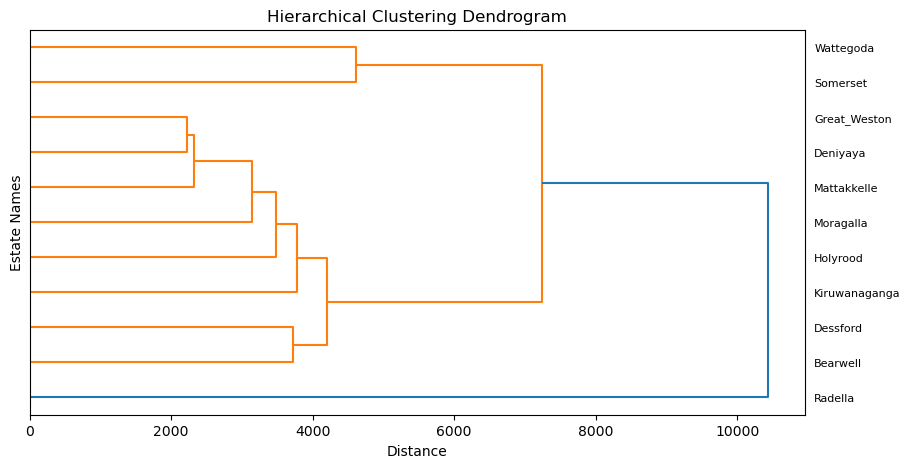

In [49]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from fastdtw import fastdtw  # You need to install the fastdtw package

output = dfdd.iloc[:, :].T
print(output)
# Fill missing values with the mean of each column
output_filled = output.fillna(output.mean())

# Define a function to calculate DTW distance between two time series
def dtw_distance(x, y):
    distance, _ = fastdtw(x, y)
    return distance

# Calculate the DTW distance matrix
outputs_dist = squareform(pdist(output_filled, metric=dtw_distance))


# import numpy as np
# import pandas as pd
# from scipy.spatial.distance import pdist, squareform
# from scipy.cluster.hierarchy import linkage, dendrogram
# import matplotlib.pyplot as plt

# output = spread_Estatewise.iloc[:, :].T
# print(output)
# # Fill missing values with the mean of each column
# output_filled = output.fillna(output.mean())

# # Calculate the Euclidean distance matrix
# outputs_dist = squareform(pdist(output_filled, metric='euclidean'))

# Perform hierarchical clustering
fit = linkage(outputs_dist, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(fit, leaf_rotation=0, leaf_font_size=8, orientation='left', labels=dfdd.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Estate Names')
plt.gca().invert_xaxis() 

In [50]:
import pandas as pd
from scipy.cluster.hierarchy import cut_tree
# Assuming 'spread_homs_per_100k' is your DataFrame containing the spread homicides data
# Assuming 'ucr_crime_1975_2015' is your original DataFrame

# Create df with the same department names as spread_homs_per_100k
#df = pd.DataFrame({'department_name': spread_homs_per_100k.columns[1:]})

# Merge clusters into full dataset
clustered_data = cut_tree(fit, n_clusters=2).flatten()
clustered_data_tidy = pd.DataFrame({'Estate': dfdd.columns[:], 'cluster': clustered_data})
clustered_data_tidy['Estate'] = clustered_data_tidy['Estate'].astype(str)

# Merge with original data
joined_clusters = pd.merge(dff, clustered_data_tidy, on='Estate')

# Display the result
joined_clusters.head()

,Year,Month,Year_Month,Estate,Green leaves/Kg,kVA,KWhr,Power_Cost,cum,Fuel_Cost,Labour days,Prouction/Kg,Output_power,Output_fuel,Region,Efficiency_1,Efficiency_2,efficiency_factor,cluster
0,2017,Jan,2017-01-01,Dessford,188183.0,156.0,34341.0,637469.0,178.0,404295.0,1426.0,47011.0,1.368947,264.106742,High Grown,Satisfied,Satisfied,High,0
1,2017,Feb,2017-02-01,Dessford,201482.0,154.0,33340.0,679081.0,157.0,365947.0,935.0,50990.0,1.529394,324.777070,High Grown,Satisfied,Satisfied,High,0
2,2017,Mar,2017-03-01,Dessford,322462.0,161.0,55048.0,752375.0,261.0,594613.0,2068.0,72503.0,1.317087,277.789272,High Grown,Satisfied,Satisfied,High,0
3,2017,Apr,2017-04-01,Dessford,264633.0,168.0,47978.0,321436.0,219.0,474032.0,1888.0,58021.0,1.209325,264.936073,High Grown,Satisfied,Satisfied,High,0
4,2017,May,2017-05-01,Dessford,312337.0,152.0,55466.0,595718.0,279.0,643118.0,2236.0,64844.0,1.169077,232.415771,High Grown,Unsatisfied,Satisfied,Moderate,0


In [51]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_score


# Extracting cluster labels from the clustered data
cluster_labels = clustered_data_tidy['cluster']

# Calculate silhouette score
silhouette = silhouette_score(output_filled, cluster_labels)
print("Silhouette Score:", silhouette)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(output_filled, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(output_filled, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.3268934067203903
Calinski-Harabasz Index: 3.778515875419884
Davies-Bouldin Index: 0.45107268690322844


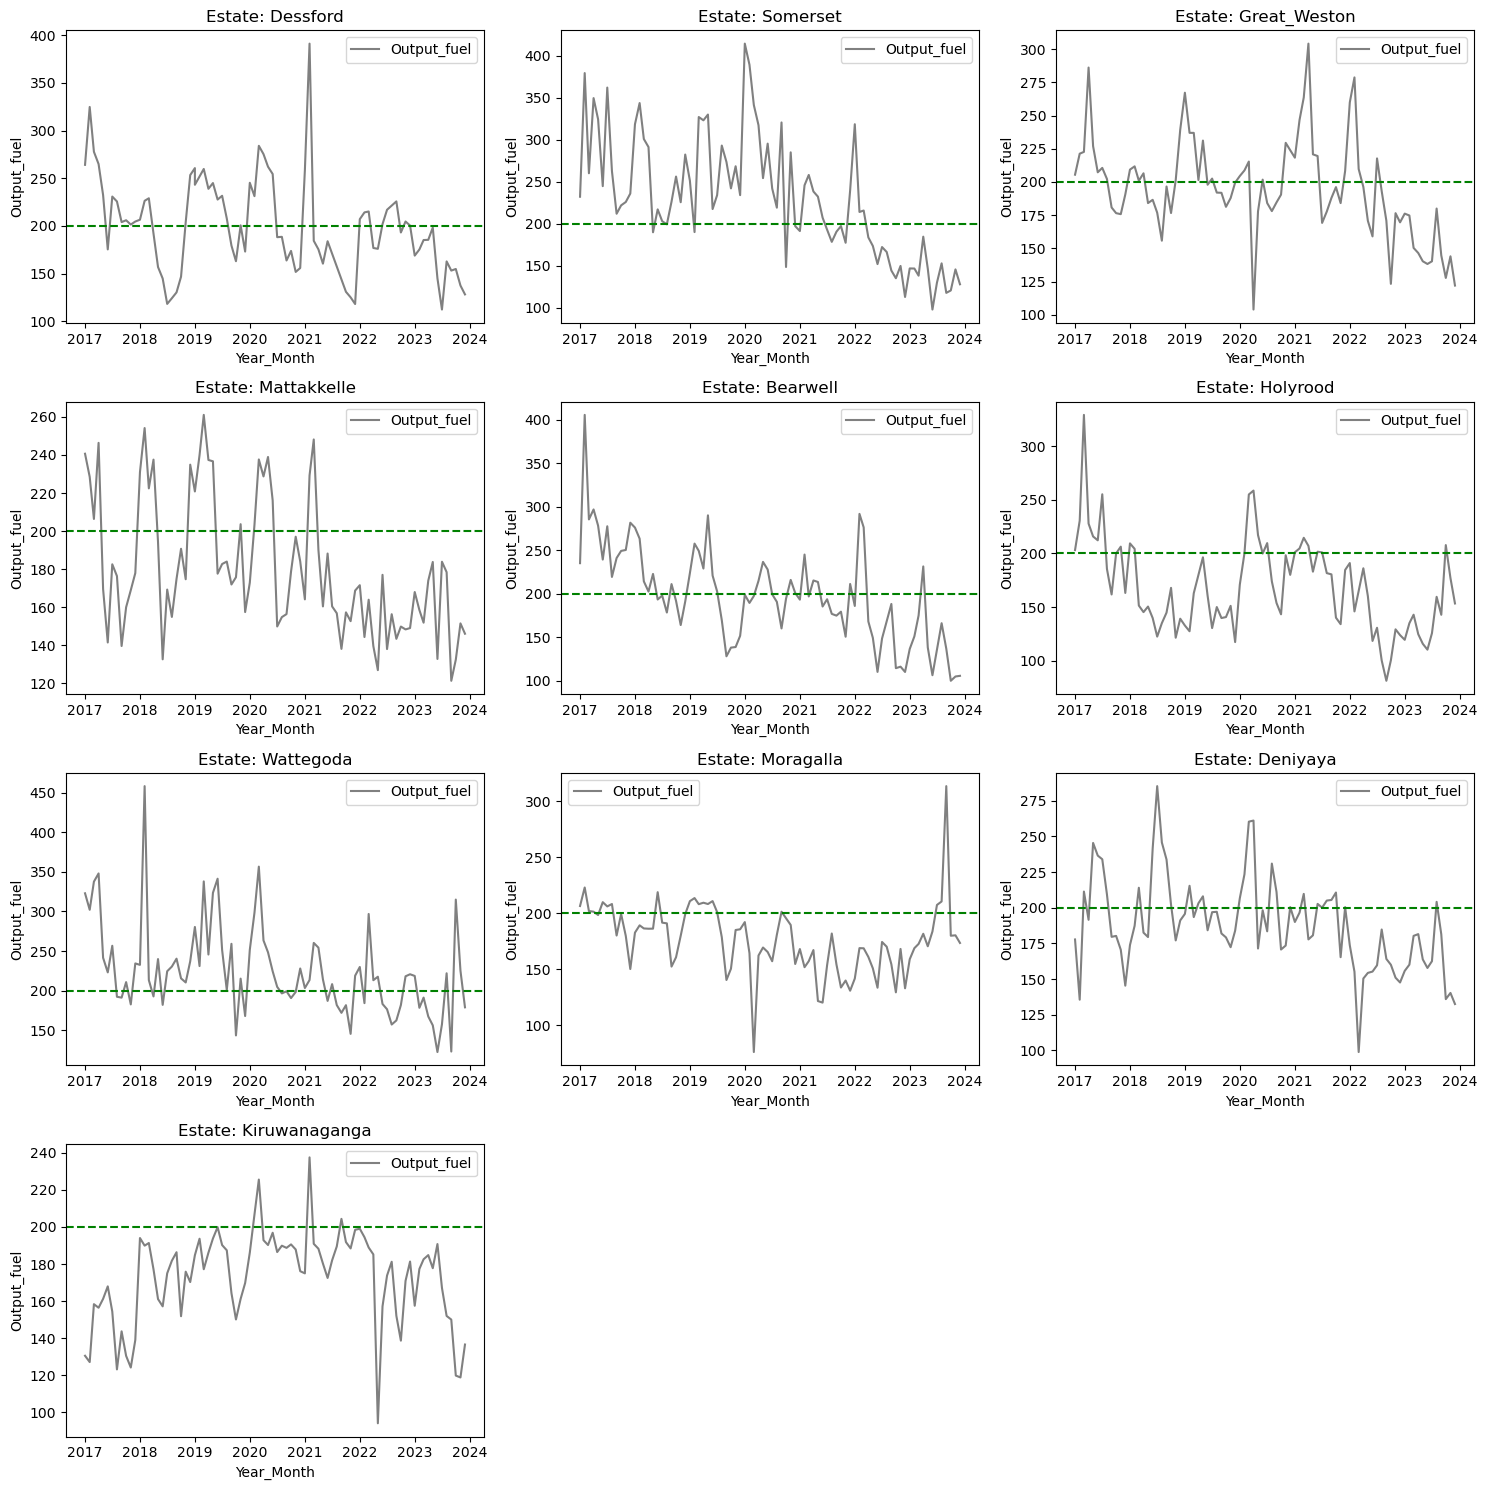

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'joined_clusters' is your DataFrame containing the merged data
# Assuming 'Production/Kg' is a column in 'joined_clusters' representing output
# Assuming 'year' is a column in 'joined_clusters' representing the year

# Filter data for cluster 1
cluster1 = joined_clusters[joined_clusters['cluster'] == 0]

# Get unique estate names in cluster 1
estate_names = cluster1['Estate'].unique()

# Calculate the number of rows and columns for the subplot grid
num_rows = 4
num_cols = 3
num_plots = min(len(estate_names), num_rows * num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Plot each estate separately
for idx, estate in enumerate(estate_names[:num_plots]):
    # Calculate the row and column indices for the subplot
    row = idx // num_cols
    col = idx % num_cols
    
    # Filter data for the current estate
    estate_data = cluster1[cluster1['Estate'] == estate]
    
    # Plot on the corresponding subplot
    axes[row, col].plot(estate_data['Year_Month'], estate_data['Output_fuel'], label='Output_fuel', color='grey')
    axes[row, col].set_xlabel('Year_Month')
    axes[row, col].set_ylabel('Output_fuel')
    axes[row, col].set_title(f'Estate: {estate}')
    axes[row, col].legend()
    
    # Add a horizontal dotted line at y=200Kg/cum
    axes[row, col].axhline(y=200, color='green', linestyle='--')
    #axes[row, col].set_ylim(20, 500)

# Remove empty subplots
for idx in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()


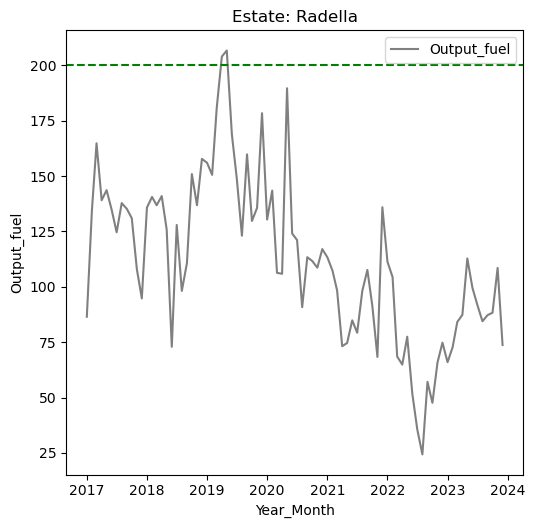

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'joined_clusters' is your DataFrame containing the merged data
# Assuming 'Production/Kg' is a column in 'joined_clusters' representing output
# Assuming 'year' is a column in 'joined_clusters' representing the year

# Filter data for cluster 1
cluster2 = joined_clusters[joined_clusters['cluster'] == 1]

# Get unique estate names in cluster 1
estate_names = cluster2['Estate'].unique()

# Calculate the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 3
num_plots = min(len(estate_names), num_rows * num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Plot each estate separately
for idx, estate in enumerate(estate_names[:num_plots]):
    # Calculate the row and column indices for the subplot
    row = idx // num_cols
    col = idx % num_cols
    
    # Filter data for the current estate
    estate_data = cluster2[cluster2['Estate'] == estate]
    
    # Plot on the corresponding subplot
    axes[row, col].plot(estate_data['Year_Month'], estate_data['Output_fuel'], label='Output_fuel', color='grey')
    axes[row, col].set_xlabel('Year_Month')
    axes[row, col].set_ylabel('Output_fuel')
    axes[row, col].set_title(f'Estate: {estate}')
    axes[row, col].legend()
    
    # Add a horizontal dotted line at y=200Kg/cum
    axes[row, col].axhline(y=200, color='green', linestyle='--')
    #axes[row, col].set_ylim(20, 500)

# Remove empty subplots
for idx in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()
